#  第五讲 无标度网络【实践】二

In [ ]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-
# Author ： 单哥的科研日常
# 关注B站和公众号：单哥的科研日常，获取更多讲解教程

### 实验环境：
### Python版本==3.9.6, networkx==2.6.3, matplotlib==3.5.2, numpy==1.23.1, pandas==1.4.3, scipy==1.9.0

## 1、配置模型生成给定度序列的网络

In [1]:
# 导入库
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from networkx.utils import powerlaw_sequence
from utils import *

In [2]:
n, gamma = 5000, 2.1
degree_seq = powerlaw_sequence(n, gamma)
int_deg = [int(di) for di in degree_seq]

while sum(int_deg)%2 != 0:
    degree_seq = powerlaw_sequence(n, gamma)
    int_deg = [int(di) for di in degree_seq]
    
    
G = nx.configuration_model(int_deg)
# 该模型会生成自环和多重链接，而这些在真实网络中通常是不会出现的
for e in G.edges():
    if e[0]==e[1]:
        print(e)

(3, 3)
(62, 62)
(62, 62)
(62, 62)
(62, 62)
(62, 62)
(670, 670)
(670, 670)
(670, 670)
(670, 670)
(670, 670)
(670, 670)
(670, 670)
(670, 670)
(670, 670)
(670, 670)
(670, 670)
(670, 670)
(670, 670)
(670, 670)
(670, 670)
(670, 670)
(670, 670)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 1246)
(1246, 

In [3]:
k, Pk = get_pdf(G)

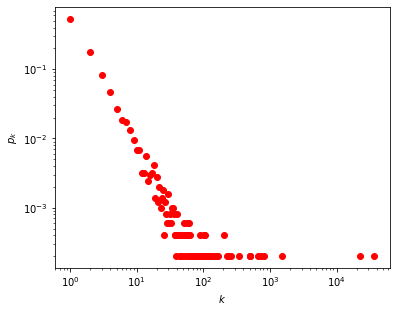

In [4]:
plt.figure(figsize=(6,4.8))
plt.plot(k, Pk, 'ro')
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.xscale("log")
plt.yscale("log")

### **总结**：配置模型会生成自环和重连边，而这些在真实网络中通常是不会出现的。生成的网络的平均度会随着幂律指数的改变而变化，即平均度不可控

## 2、隐参数模型生成给定度分布指数的无标度网络

In [5]:
N = 5000
gamma = 2.1
avk = 6.0
L = int(avk*N/2)

G = generate_SF_network(N, gamma, L)
k, Pk = get_pdf(G)

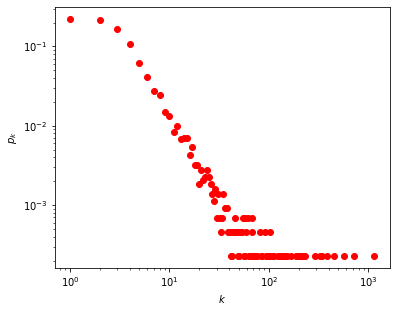

In [6]:
plt.figure(figsize=(6, 4.8))
plt.plot(k, Pk, 'ro')
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.xscale("log")
plt.yscale("log")

## 3、度保持的网络随机化

In [5]:
# 加载蛋白质网络数据集
df = pd.read_csv("protein_interaction.csv")
G = nx.from_pandas_edgelist(df, 'source', 'target', create_using = nx.Graph())
print(len(G.nodes()), len(G.edges()))

2018 2930


In [7]:
# 删除self-loops
self_edges = []
for e in G.edges():
    if e[0]==e[1]:
        self_edges.append(e)
G.remove_edges_from(self_edges)

Gcc = sorted(nx.connected_components(G), key=len, reverse=True) 
# 得到图G的最大连通组件
LCC = G.subgraph(Gcc[0])

# 获取原始网络的最大连通子图节点数和连边数
N, M = len(LCC.nodes), len(LCC.edges())
print(N, M)
# nx.draw(LCC, pos=nx.kamada_kawai_layout(LCC), node_size=30, node_color="red")

1647 2518


In [8]:
print(nx.average_clustering(LCC))

# 生成度保持的随机化网络：调用double_edge_swap函数
newG = LCC.copy()
G_d = nx.double_edge_swap(newG, nswap=M, max_tries=5*M)
print(nx.average_clustering(G_d))
# nx.draw(G_d, pos=nx.kamada_kawai_layout(G_d), node_size=30, node_color="red")

0.05659957171711166
0.009986526709458028


In [9]:
# 生成完全随机化的网络
G_r = nx.gnm_random_graph(N, M)

### 测试小世界性质

In [10]:
all_sp1, Pl = get_pdf_spl(newG)
all_sp1_d, Pl_d = get_pdf_spl(G_d)
all_sp1_r, Pl_r = get_pdf_spl(G_r)

Text(0, 0.5, '$p_d$')

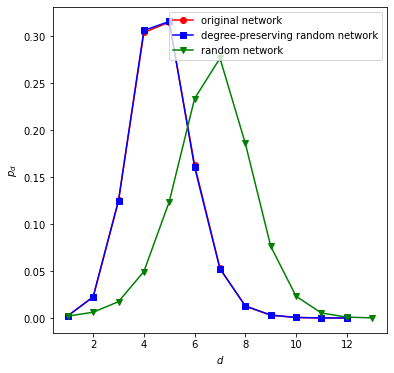

In [11]:
plt.figure(figsize=(6,6))
plt.plot(all_sp1, Pl, 'ro-', label='original network')
plt.plot(all_sp1_d, Pl_d, 'bs-', label='degree-preserving random network')
plt.plot(all_sp1_r, Pl_r, 'gv-', label='random network')
plt.legend(loc=0)
plt.xlabel("$d$")
plt.ylabel("$p_d$")

In [13]:
print(nx.is_connected(LCC))
print(nx.is_connected(G_d))

True
False


In [12]:
k1, Pk1 = get_pdf(LCC)
k2, Pk2 = get_pdf(G_d)
k3, Pk3 = get_pdf(G_r)

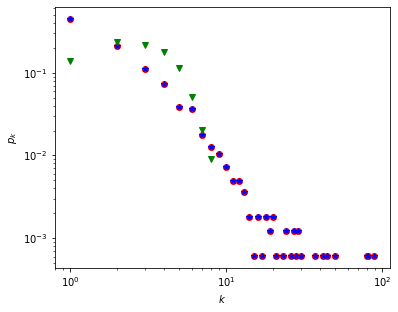

In [14]:
plt.figure(figsize=(6, 4.8))
plt.plot(k1, Pk1, 'ro')
plt.plot(k2, Pk2, 'b*')
plt.plot(k3, Pk3, 'gv')
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.xscale("log")
plt.yscale("log")